# Compare YOLO Runs (mAP50/95 and train losses)

Overlay mAP curves and train losses for two runs.

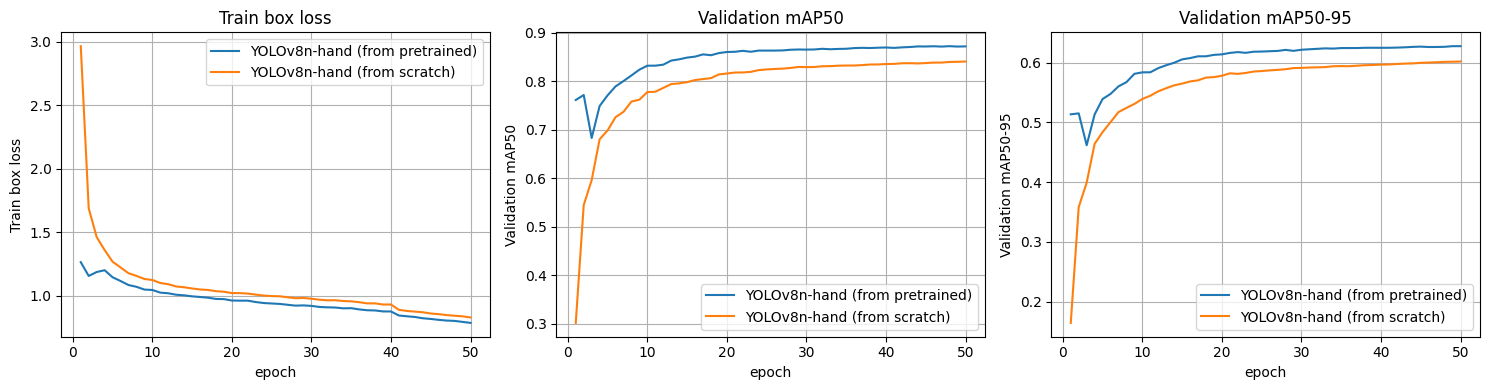

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

run_paths = {
    "YOLOv8n-hand (from pretrained)": "runs/detect/train4/results.csv",
    "YOLOv8n-hand (from scratch)": "runs/detect/train5/results.csv",
}

dfs = {}
for name, path in run_paths.items():
    try:
        df = pd.read_csv(path)
        df["epoch"] = df.index + 1
        dfs[name] = df
    except FileNotFoundError:
        print(f"Missing {path}, skipping {name}")

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True)
metric_keys = ["train/box_loss", "metrics/mAP50(B)", "metrics/mAP50-95(B)"]
titles = ["Train box loss", "Validation mAP50", "Validation mAP50-95"]

for ax, mkey, title in zip(axes, metric_keys, titles):
    for name, df in dfs.items():
        if mkey in df:
            ax.plot(df["epoch"], df[mkey], label=name)
    ax.set_title(title)
    ax.set_xlabel("epoch")
    ax.set_ylabel(title)
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


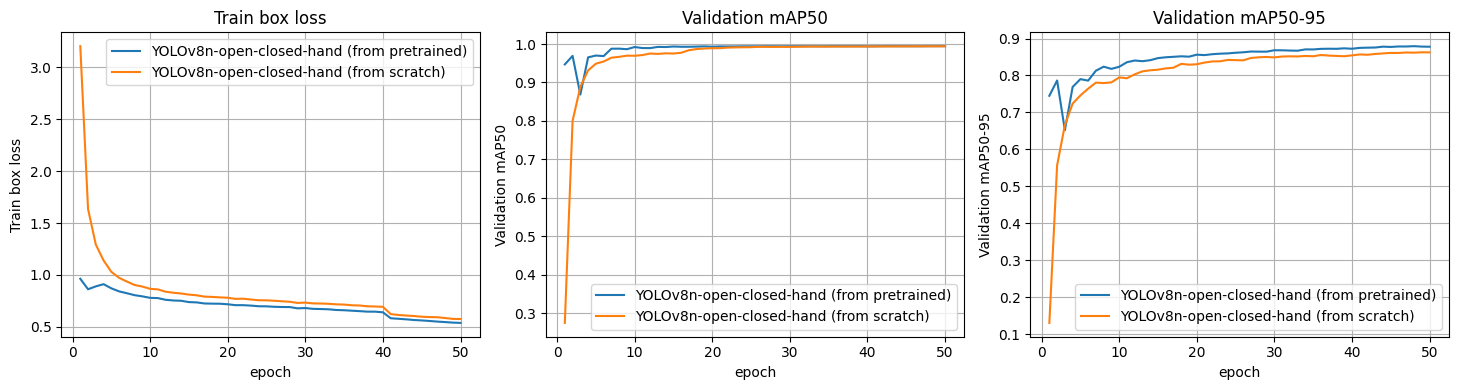

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Paths to results.csv for each run
run_paths = {
    "YOLOv8n-open-closed-hand (from pretrained)": "runs/detect/train8/results.csv",
    "YOLOv8n-open-closed-hand (from scratch)": "runs/detect/train9/results.csv",
}

dfs = {}
for name, path in run_paths.items():
    try:
        df = pd.read_csv(path)
        df["epoch"] = df.index + 1
        dfs[name] = df
    except FileNotFoundError:
        print(f"Missing {path}, skipping {name}")

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True)
metric_keys = ["train/box_loss", "metrics/mAP50(B)", "metrics/mAP50-95(B)"]
titles = ["Train box loss", "Validation mAP50", "Validation mAP50-95"]

for ax, mkey, title in zip(axes, metric_keys, titles):
    for name, df in dfs.items():
        if mkey in df:
            ax.plot(df["epoch"], df[mkey], label=name)
    ax.set_title(title)
    ax.set_xlabel("epoch")
    ax.set_ylabel(title)
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


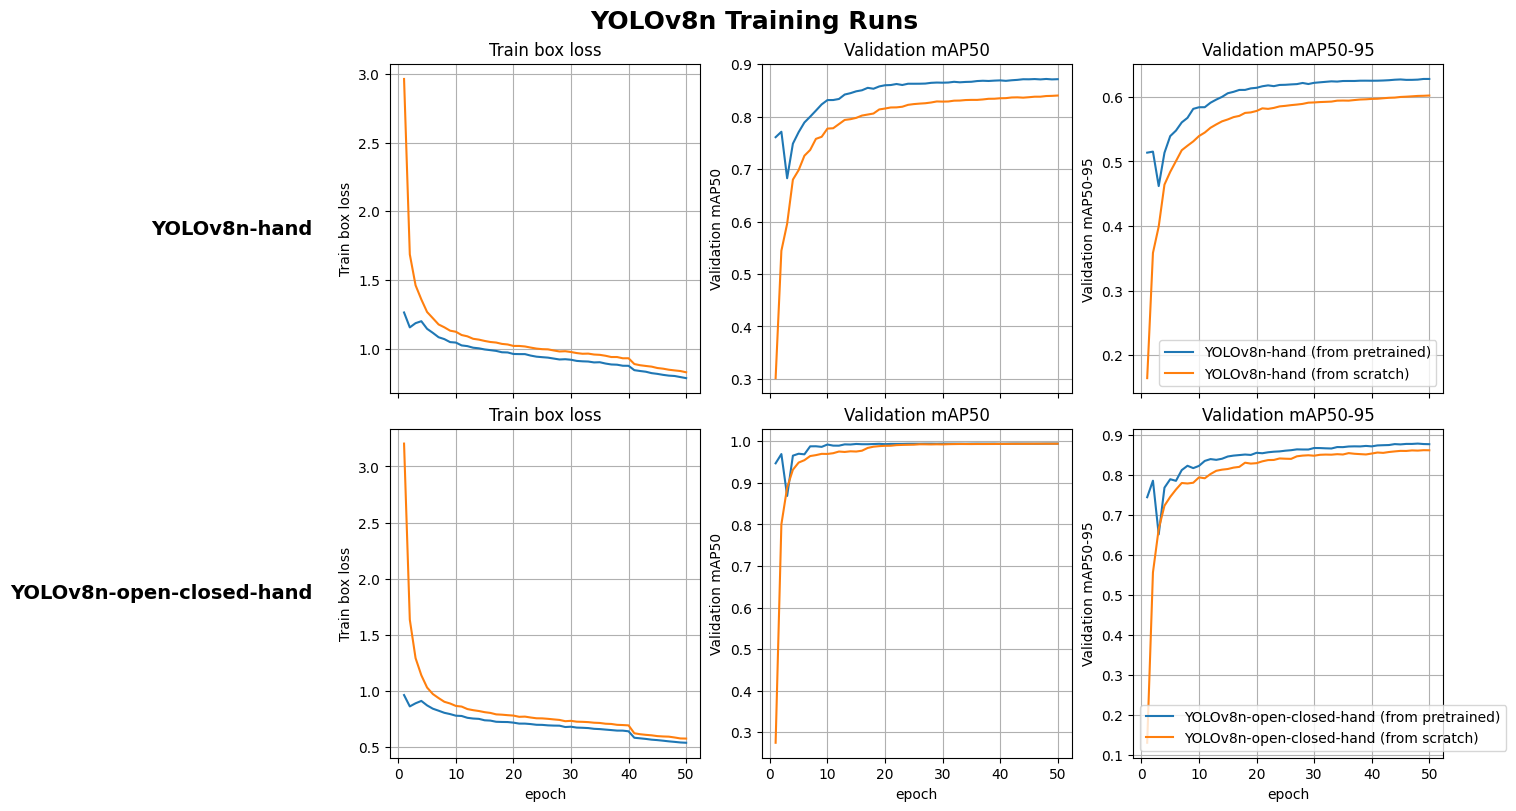

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

hand_paths = {
    "YOLOv8n-hand (from pretrained)": "runs/detect/train4/results.csv",
    "YOLOv8n-hand (from scratch)": "runs/detect/train5/results.csv",
}
open_closed_paths = {
    "YOLOv8n-open-closed-hand (from pretrained)": "runs/detect/train8/results.csv",
    "YOLOv8n-open-closed-hand (from scratch)": "runs/detect/train9/results.csv",
}

metric_keys = ["train/box_loss", "metrics/mAP50(B)", "metrics/mAP50-95(B)"]
titles = ["Train box loss", "Validation mAP50", "Validation mAP50-95"]

def load_runs(paths):
    out = {}
    for name, path in paths.items():
        try:
            df = pd.read_csv(path)
            df["epoch"] = df.index + 1
            out[name] = df
        except FileNotFoundError:
            print(f"Missing {path}, skipping {name}")
    return out

hand_dfs = load_runs(hand_paths)
open_closed_dfs = load_runs(open_closed_paths)

fig, axes = plt.subplots(2, len(metric_keys), figsize=(15, 8), sharex="col", constrained_layout=True)
fig.suptitle("YOLOv8n Training Runs", fontsize=18, fontweight="bold")

# Hand rows
for col, (mkey, title) in enumerate(zip(metric_keys, titles)):
    ax = axes[0, col]
    for name, df in hand_dfs.items():
        if mkey in df:
            ax.plot(df["epoch"], df[mkey], label=name)
    ax.set_title(title)
    ax.set_ylabel(title)
    ax.grid(True)
    if col == len(metric_keys)-1:
        ax.legend()
axes[0,0].annotate("YOLOv8n-hand", xy=(0, 0.5), xycoords=("axes fraction","axes fraction"), xytext=(-0.25, 0.5), textcoords="axes fraction", va="center", ha="right", fontsize=14, weight="bold")

# Open/closed rows
for col, (mkey, title) in enumerate(zip(metric_keys, titles)):
    ax = axes[1, col]
    for name, df in open_closed_dfs.items():
        if mkey in df:
            ax.plot(df["epoch"], df[mkey], label=name)
    ax.set_title(title)
    ax.set_xlabel("epoch")
    ax.set_ylabel(title)
    ax.grid(True)
    if col == len(metric_keys)-1:
        ax.legend()
axes[1,0].annotate("YOLOv8n-open-closed-hand", xy=(0, 0.5), xycoords=("axes fraction","axes fraction"), xytext=(-0.25, 0.5), textcoords="axes fraction", va="center", ha="right", fontsize=14, weight="bold")

plt.show()
